**Klasifikasi Gambar (Gunting, Batu, Kertas)**

*   **Name : Siti Ma'rufatus Sholihah**
*   **Email: sitea.maruffa@gmail.com**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


Mendownload dataset rockpapersiccors

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-30 21:20:49--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.04MB/s    in 48s     

2021-06-30 21:21:38 (6.41 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Mengaktifkan Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengekstrak dataset dengan metode unzip

In [ ]:
import os
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
!ls "/tmp/rockpaperscissors/rps-cv-images"

paper  README_rpc-cv-images.txt  rock  scissors


Set directory untuk data gambar scissors, rock, dan paper

In [ ]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
scissors_dir = os.path.join(base_dir, 'scissors')
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')

Melihat isi dataset

In [ ]:
scissors_fnames = os.listdir(scissors_dir)
print("scissors:",scissors_fnames[:5])

rock_fnames = os.listdir(rock_dir)
print("rock:",rock_fnames[:5])

paper_fnames = os.listdir(paper_dir)
print("paper:",paper_fnames[:5])

scissors: ['XpFaeZAqFUqqJ85b.png', '1lEpWTJDphkm3HdC.png', 'TxkHaqZ5Mg3Jfs80.png', 'iYOrHPwEvEe7rXSL.png', 'Px1M92VqNpLveOTC.png']
rock: ['9Ke26ZpKvhVSXl4V.png', 'qYTvWILCYIauIMkW.png', 'D7Ykcj1tYAannu8h.png', 'S9iRciyZ0OktMu7s.png', 'y7JyZqsFZUwdvkY2.png']
paper: ['5kJec3v9txvrAb4g.png', '4hcthlc3eCByBJFh.png', 'Zo0eTAGaUb4ewSkf.png', 'HyLg8tH9blwT6eVy.png', '3YvRoN0ZGuXVWEbh.png']


In [ ]:
print('total scissors images:', len(os.listdir(scissors_dir)))
print('total rock images:', len(os.listdir(rock_dir)))
print('total paper images:', len(os.listdir(paper_dir)))

total scissors images: 750
total rock images: 726
total paper images: 712


Menampilkan gambar scissors, rock, paper dalam satu tampilan

In [ ]:
%matplotlib inline

# parameter untuk grafik; menampilkan gambar dalam konfigurasi 3x4
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 4

# index awal untuk iterasi gambar
pic_index = 0

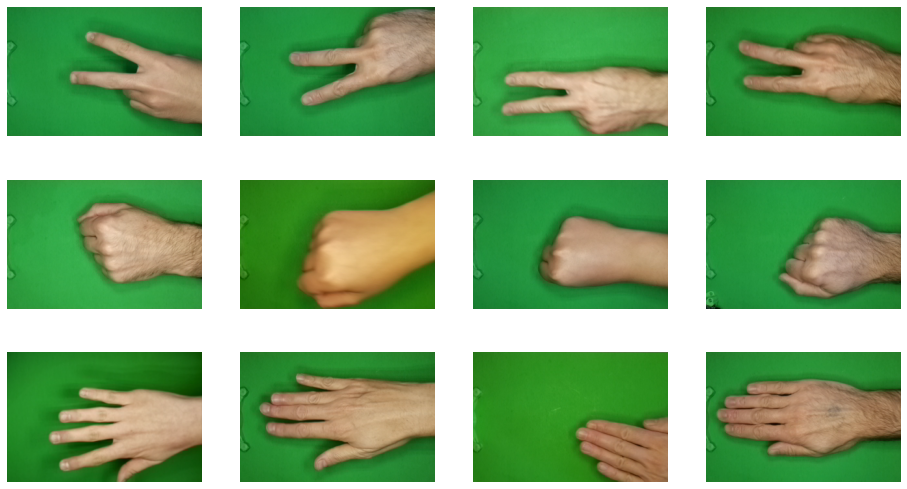

In [ ]:
# mengatur output gambar matplotlib, dan ukurannya agar fit 4x3 gambar
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

pic_index += 4
next_scissors_pix = [os.path.join(scissors_dir, fname) 
                for fname in scissors_fnames[pic_index-4:pic_index]]
next_rock_pix = [os.path.join(rock_dir, fname) 
                for fname in rock_fnames[pic_index-4:pic_index]]
next_paper_pix = [os.path.join(paper_dir, fname) 
                for fname in paper_fnames[pic_index-4:pic_index]]

for i, img_path in enumerate(next_scissors_pix+next_rock_pix+next_paper_pix):

  # mengatur subplot; index subplot dimulai dari 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # tidak menampilkan gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Menggunakan Image Data Generator

Import library yang digunakan

In [ ]:
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator

Melakukan proses augmentasi gambar pada setiap sampel di dataset dan membagi data menjadi train set dan validation set dengan ukuran validation set 40% dari total dataset

In [ ]:
base_dir = "/tmp/rockpaperscissors/rps-cv-images"
#proses augmentasi gambar pada sampel data training
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    rotation_range=40,
                    horizontal_flip=True,
                    zoom_range=0.2,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4              #60% Data Training dan 40% Data Validasi
                    )

Pelabelan data menggunakan Image Data Generator untuk mempersiapkan data latih yang akan dipelajari oleh model

In [ ]:
#Generator data training
train_generator = train_datagen.flow_from_directory(
        base_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        class_mode='categorical',
        shuffle=True,
        subset='training'
        )

validation_generator = train_datagen.flow_from_directory(
        base_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        class_mode='categorical',
        shuffle=True,
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Setting akurasi CNN

Model yang digunakan adalah model Sequential

In [ ]:
from tensorflow.keras import Sequential, layers

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 15, 15, 64)      

Melakukan compile model

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer='rmsprop', 
              metrics=['accuracy'])

Training model menggunakan model fit

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=25,                   #jumlah batch yang akan dieksekusi pada setiap epoch
    epochs=25,                            #jumlah perulangan komputasi (epoch)
    validation_data=validation_generator, #menampilkan akurasi data validasi
    validation_steps=5,                   #jumlah batch yang akan dieksekusi pada setiap epoch
    verbose=2
)

Epoch 1/25
25/25 - 6s - loss: 0.1073 - accuracy: 0.9714 - val_loss: 0.1206 - val_accuracy: 0.9750
Epoch 2/25
25/25 - 6s - loss: 0.0882 - accuracy: 0.9712 - val_loss: 0.0794 - val_accuracy: 0.9750
Epoch 3/25
25/25 - 6s - loss: 0.1508 - accuracy: 0.9400 - val_loss: 0.0611 - val_accuracy: 0.9812
Epoch 4/25
25/25 - 6s - loss: 0.1009 - accuracy: 0.9675 - val_loss: 0.0985 - val_accuracy: 0.9750
Epoch 5/25
25/25 - 6s - loss: 0.0855 - accuracy: 0.9688 - val_loss: 0.2125 - val_accuracy: 0.9750
Epoch 6/25
25/25 - 6s - loss: 0.0872 - accuracy: 0.9700 - val_loss: 0.0756 - val_accuracy: 0.9812
Epoch 7/25
25/25 - 6s - loss: 0.0998 - accuracy: 0.9638 - val_loss: 0.1407 - val_accuracy: 0.9563
Epoch 8/25
25/25 - 6s - loss: 0.0868 - accuracy: 0.9701 - val_loss: 0.2687 - val_accuracy: 0.9625
Epoch 9/25
25/25 - 6s - loss: 0.0758 - accuracy: 0.9662 - val_loss: 0.0288 - val_accuracy: 0.9937
Epoch 10/25
25/25 - 6s - loss: 0.1470 - accuracy: 0.9575 - val_loss: 0.0771 - val_accuracy: 0.9688
Epoch 11/25
25/25 -

Evaluasi akurasi dan loss dari model

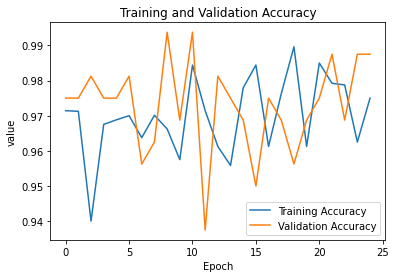

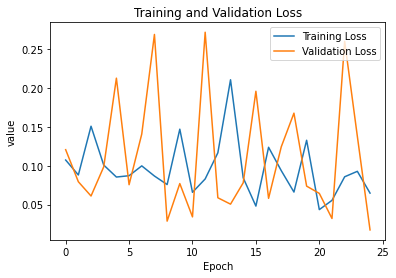

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.ylabel('value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.figure()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')

plt.ylabel('value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")

plt.show()

Implementasi uji coba klasifikasi gambar rock paper scissors

In [ ]:
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


Saving IMG_20210701_052746.jpg to IMG_20210701_052746 (1).jpg
IMG_20210701_052746.jpg
scissors


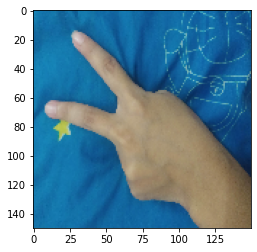

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # memprediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes [0][0]==1:
    print('paper')
  elif classes [0][1]==1:
    print('rock')
  elif classes [0][2]==1:
    print('scissors')
  else:
    print('unknown')

Menguji perilaku model dengan Keras Callbacks

In [ ]:
save_callback = keras.callbacks.ModelCheckpoint(
    "checkpoint/", save_weights_only=True, monitor="train_acc", save_best_only=False,
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor="loss", factor=0.1, patience=3, mode="max", verbose=1
)

class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get("accuracy") > 0.9:
            print("Accuracy over 90%, quitting training")
            self.model.stop_training = True

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
              optimizer='rmsprop',
              metrics=['accuracy'])

history=model.fit(
    train_generator,
    steps_per_epoch=25,                         #jumlah batch yang akan dieksekusi pada setiap epoch
    epochs=25,                                  #jumlah perulangan komputasi (epoch)
    validation_data=validation_generator,       #menampilkan akurasi data validasi
    validation_steps=5,                         #jumlah batch yang akan dieksekusi pada setiap epoch
    verbose=2,
    callbacks=[save_callback, lr_scheduler, MyCallback()]
)

Epoch 1/25
25/25 - 7s - loss: 0.2507 - accuracy: 0.9494 - val_loss: 0.0654 - val_accuracy: 0.9688
Accuracy over 90%, quitting training
